# Value at Risk

Session objectives:
- Compute Value at Risk (VaR)
    - Empirical VaR and Expected Shortfall on empirical data
    - Parametric VaR using the Normal distribution assumption
- Simulate stock/index level using Geometric Brownian Motion (GBM)
    - Simulated VaR  
- Backtesting a VaR
- Compute expected Shortfall 

## 1. Import packages (matplotlib, pandas, os,...) and data

### 1.1 Import packages (matplotlib, pandas, os,...)

c'est quoi un import relatif

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 

import statsmodels.api as sm

from scipy.stats import norm

In [2]:
# Remark :  import all vs relative import  

In [3]:
import math

math.sqrt(9)

3.0

In [4]:
from math import sqrt

sqrt(9)

3.0

### 1.2. Set your working directory using os.chldr (same as in the previous exercice on Volatility)


In [5]:
#os.chdir(r'C:\Users\cdes1\OneDrive - ICHEC\Documents\Cours\PortfolioManagement')
os.chdir(r'/Users/christophe/OneDrive - ICHEC/Documents/Cours/PortfolioManagement')

### 1.3. Import and check the data
- Import the excel File  <code>sp500_daily.xlsx</code>. Keep data from 2010 onwards. 
- Verify your data by showing the first five rows and the last five rows (as in the previous exercice on Volatility)

In [6]:
df = pd.read_excel('data/sp500_daily.xlsx', index_col=0, parse_dates=True)
df = df.loc['2010-01-01':]
df.head()

CLOSE
Date                 
2010-01-04  1132.9855
2010-01-05  1136.5234
2010-01-06  1137.1378
2010-01-07  1141.6949
2010-01-08  1144.9831

In [7]:
df.tail()

CLOSE
Date                 
2022-12-23  3844.8150
2022-12-27  3829.2493
2022-12-28  3783.2219
2022-12-29  3849.2832
2022-12-30  3839.4966

### 1.4. Compute daily log-returns in ndarray (numpy) <code>rets</code> to compute empirical VaR

In [8]:
prices = df['CLOSE']
rets = np.log(prices / prices.shift(1))[1:] 
print(rets[:10])

Date
2010-01-05    0.003118
2010-01-06    0.000540
2010-01-07    0.004000
2010-01-08    0.002876
2010-01-11    0.001742
2010-01-12   -0.009424
2010-01-13    0.008287
2010-01-14    0.002428
2010-01-15   -0.010884
2010-01-19    0.012425
Name: CLOSE, dtype: float64


- Compute the number of observations (length of vector <code>rets</code>)

In [9]:
n = len(rets)
n

3271

## 2. Empirical VaR 

- Compute the 95% and the 99% VaR of the empirical distribustion
- Use the 5th and the 1st percentile of the return distribution using the function <code>np.percentile([returns],q=[percentile])</code>. 
- The percentile should be a number between 0 and 100. 
- Note: the percentile 0 corresponds to the minimum, check the result with the function  (<code>np.min</code>) of the distribution. 
- Note: the percentile 100 corresponds to the maximum, check the result with the function (<code>np.max</code>) of the distribution. 

In [10]:
p5 = np.percentile(rets, q=5)
print("Var(5%):", f"{p5:.4%}")

Var(5%): -1.7348%


In [11]:
p1=np.percentile(rets,q=1)
print("VaR(1%):",f"{p1:.4%}")

VaR(1%): -3.2953%


In [12]:
np.percentile(rets, q=0)

-0.12765113378213216

In [13]:
np.min(rets)

-0.12765113378213216

In [14]:
np.percentile(rets, q=100)

0.0896853763515508

In [15]:
np.max(rets)

0.0896853763515508

In [16]:
np.maximum(4, 5)

5

<AxesSubplot:xlabel='Date'>

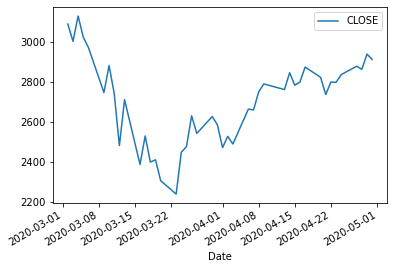

In [17]:
df.loc['2020-03-01':'2020-04-30'].plot()

- Identify when the maximum return happened

In [18]:
rets[rets==np.max(rets)]

Date
2020-03-24    0.089685
Name: CLOSE, dtype: float64

## 3. Represent the empirical distribution and check for Normality (To use parametric VaR)

### 3.1. Represent the histogram of the return distribution

- Add the two estimated emprical VaR (95% and 99%) (with 2 vertical bars) 

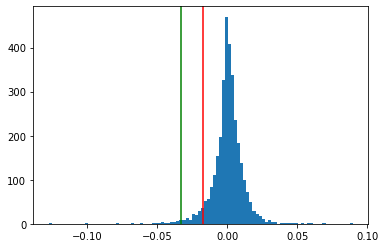

In [19]:
num_bins = 100 
plt.hist(rets, bins=num_bins)
plt.axvline(x=p5, color='red')
plt.axvline(x=p1, color='green');

### 3.2. Compare the empirical ditribution with a Normal distrubution by adding a normal curve on the graph 

In [20]:
import scipy.stats as scs 

- Note : Function equivalent to =NORM.DIST(x;0;1;TRUE) in Excel

In [21]:
scs.norm.cdf(-1.96)

0.024997895148220435

- Add a normal curve on the graph and observe the relative "Normality" of the empirical data

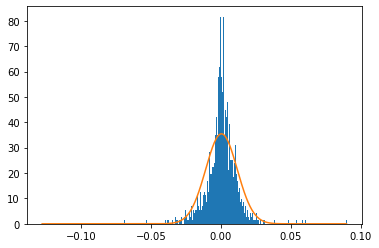

In [22]:
num_bins = 1000
plt.hist(rets, bins=num_bins, density=True);
x = np.linspace(np.min(rets), np.max(rets), 1000)
r = np.mean(rets)
pdf = scs.norm.pdf(x, loc=r, scale=np.std(rets))
#print(pdf)
plt.plot(x, pdf);

- Use the qqplot to observe the compare the tails of the empiical distribution wth the tails of the Normal distribution

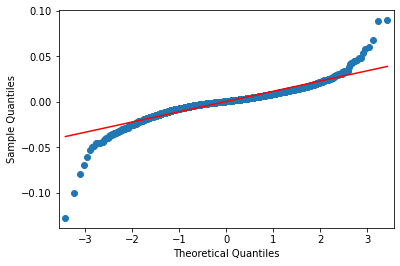

In [23]:
sm.qqplot(rets, line='s');

### 3.3. Test for normality 

- Use the Jarque Bera test and interpret the result

$H_0$: Data are normally distributed

$H_1$: Data are not normally distributed

$$ JB = \frac{n - k}{6} \left ( S^2 + \frac{(K-3)^2}{4} \right ) \sim \chi^2(2) $$

In [24]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(rets)

(24046.491072008783, 0.0, -0.7337810849301992, 16.201526948721195)

In [25]:
from scipy.stats import jarque_bera

jarque_bera(rets)

Jarque_beraResult(statistic=24046.49107200881, pvalue=0.0)

We can verify the the Jarque Bera test by coding the test step by step

- Compute S
- Compute K
- Compute JB

In [26]:
from scipy.stats import skew, kurtosis
print(skew(rets))
print(kurtosis(rets))

-0.7337810849301992
13.201526948721195


In [27]:
m3 = np.sum((rets - np.mean(rets))**3) / n
m2 = np.sum((rets - np.mean(rets))**2) / n
Sk = m3 / m2**(3/2)
Sk

-0.7337810849301989

In [28]:
m4 = np.sum((rets - np.mean(rets))**4) / n
Ku = m4 / m2**2
Ku - 3

13.201526948721195

In [29]:
JB = n / 6 * (Sk**2 + ((Ku-3)**2)/4)
JB

24046.491072008783

#### Another normality test : Shapiro Wilk test 

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [30]:
from scipy.stats import shapiro
shapiro(rets)

ShapiroResult(statistic=0.8889527916908264, pvalue=1.5694542800437951e-43)

#### A test for any distribution : Anderson test 

The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [31]:
from scipy.stats import anderson
anderson(rets)

AndersonResult(statistic=68.0861414366509, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## 4. Compute parametric VaR (with a Normal distribution assumption)

### 4.1. Compute the average daily return

In [32]:
mu = np.average(rets)
print(mu)

0.0003731229227067712


### 4.2. Compute the daily standard deviation

In [33]:
sigma = np.std(rets, ddof=1)
print(sigma)

0.011254626546227362


### 4.3. Compute parametric VaR

Note : Equivalent to =NORM.INV(x;0;1) in Excel

In [34]:
print('99%', norm.ppf(0.01))
print('97,5%', norm.ppf(0.025))
print('95%', norm.ppf(0.05))

99% -2.3263478740408408
97,5% -1.9599639845400545
95% -1.6448536269514729


In [35]:
Z = norm.ppf(0.05)
mu + Z * sigma

-0.018139090371839632

In [36]:
p5

-0.017347574787051057

In [37]:
Z = norm.ppf(0.01)
mu + Z * sigma

-0.025809053616232862

In [38]:
p1

-0.03295346538723258

## 5. Simulate a data distribution with the Geometric brownian motion (GBM) to compute a VaR by Monte Carlo simulation

In [39]:
df.tail()

CLOSE
Date                 
2022-12-23  3844.8150
2022-12-27  3829.2493
2022-12-28  3783.2219
2022-12-29  3849.2832
2022-12-30  3839.4966

### 5.1. Simulate a data distribution the next day using the GBM

<p style="color:red">Edit (23/04/23):</p> 

<code>T=1/252</code> has been replaced with <code>T=1</code>

<code>r</code> is the mean value of daily return and <code>sigma</code> is the standard deviation of the returns (but not annualized).

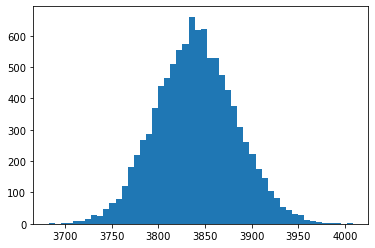

In [57]:
np.random.seed(0)
S0 = df.iloc[-1]['CLOSE']
r = np.mean(rets)
sigma = np.std(rets)
T = 1
numSim = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma**2) * T +
                 np.random.standard_normal(numSim) * sigma * np.sqrt(T))
plt.hist(ST1, bins=50);

### 5.2. Compute the 99% VaR

-0.02563021860323059


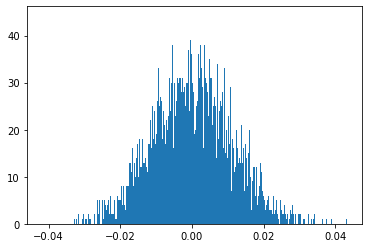

In [58]:
rets = np.log(ST1 / S0)
plt.hist(rets, bins=1000);
print(np.percentile(rets, q=1))

### 5.3. Simulate a single return trajectory on one year and a distribution in one year

<p style="color:red">Edit (23/04/23):</p> 

<code>mu</code> is the mean value of daily return multiplied by 252. Therefore it represents the annual mean. 

<code>sigma</code> is the **annualized** standard deviation of the returns.

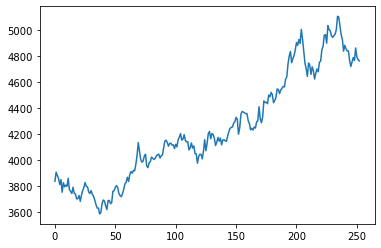

In [63]:
np.random.seed(1)
T = 252
mu = np.mean(rets)*T          # new 
sigma = np.std(rets)*sqrt(T)  # new 
S = np.zeros(T+1)
S[0] = S0
dt = 1/252
for t in range(T):
    S[t+1] = S[t] * np.exp((mu-sigma**2/2)*dt + sigma * np.random.normal(0, 1) * np.sqrt(dt))
plt.plot(S);

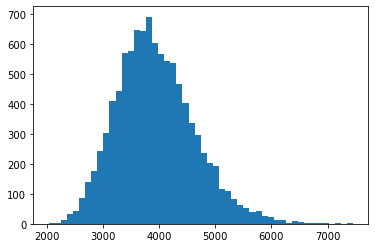

In [67]:
numSim = 10000 
T = 252 
dt = 1 / T 
mu = np.mean(rets)*T              # new 
sigma = np.std(rets)*np.sqrt(T)   # new 
S = np.zeros((T+1, numSim))
S[0] = S0
for t in range(1, T+1):
    S[t] = S[t-1] * np.exp((mu - sigma**2/2) * dt + 
                          sigma * np.sqrt(dt) * np.random.standard_normal(numSim))
    
plt.hist(S[-1], bins=50);

In [65]:
S

array([[3839.4966    , 3839.4966    , 3839.4966    , ..., 3839.4966    ,
        3839.4966    , 3839.4966    ],
       [3722.30340007, 3923.22264717, 3855.31569663, ..., 3861.11194267,
        3873.85568493, 3760.96120326],
       [3748.39880064, 3937.33272466, 3908.94398872, ..., 3861.53992374,
        3859.69168867, 3717.22701904],
       ...,
       [2925.63745469, 3947.4365368 , 3051.6340238 , ..., 3729.83556295,
        4826.42577662, 3981.43817732],
       [2902.6029258 , 4000.91410254, 3031.00608792, ..., 3727.39843353,
        4839.9391242 , 4008.86906069],
       [2899.37229201, 3960.90670635, 3034.68939292, ..., 3717.6130952 ,
        4807.63832887, 4061.56943795]])

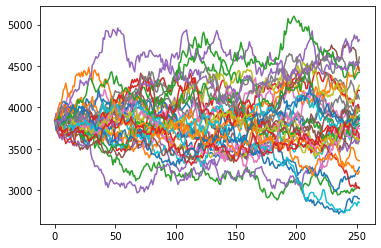

In [66]:
plt.plot(S[:,:35]);

## 6. VaR Backtesting and the binomial distribution

$$ b(x, n, p) = \begin{pmatrix} n \\ x \end{pmatrix} p^n (1-p)^{n-x} $$

LOI.BINOMIALE(1 ; 250 ; 0.01 ; faux) = 0.205 (probability)

$$ B(x, n, p) \sum_{y=0}^x b(y, n, p) $$ 

LOI.BINOMIALE(1 ; 250 ; 0,01 ; vrai) = 0.286 (cumulative probability)

In [46]:
from scipy.stats import binom 

x = 1    # x succes
n = 250  # n essais
p = 0.01 # proba 
binom.pmf(x, n, p) # pmf = probability mass function 

0.20469322263177145

In [47]:
from math import factorial 

def combi(n, x):
    c = factorial(n)/(factorial(x)*factorial(n-x))
    return c

def binomial(x, n, p):
    return combi(n, x) * p**x * (1-p)**(n-x)

binomial(x, n, p)

0.2046932226317709

In [48]:
x = 1 
n = 250
p = 0.01
binom.cdf(x, n, p)

0.28575173879395216

In [49]:
def Binomial(x, n, p):
    b = 0
    for j in range(x+1):
        b += binomial(j, n, p)
    return b

Binomial(x, n, p)

0.28575173879395216

LOI.BINOMIALE(4;250;0,01;faux) = 0,134 (probabilité)

LOI.BINOMIALE(4;250;0,01;vrai) = 0,892 (probabilité cumulée 0,1,2,3 et 4)

In [50]:
x = 4 
n = 250
p = 0.01
print(binom.pmf(x, n, p))
print(binom.cdf(x, n, p))

0.13407092913874208
0.8921876269036252


In [51]:
x = 5
n = 250
p = 0.01
print(binom.pmf(x, n, p))
print(binom.cdf(x, n, p))

0.06662918902652627
0.9588168159301517


## 7.  Conditional VaR / Expected Shortfall

### 7.1. Keep the 5th data percentile and count the observations

In [52]:
rets = np.log(df / df.shift(1))[1:]
rets = np.array(rets)
p5 = np.percentile(rets, q=5)
p5

-0.017347574787051057

In [53]:
low_returns = rets[rets < p5]

In [54]:
len(low_returns) / len(rets)

0.05013757260776521

### 7.2. Compute the average of the 5th tail data and show the ES on the distribution graph

In [55]:
cvar = np.mean(low_returns)
cvar

-0.028044792302960128

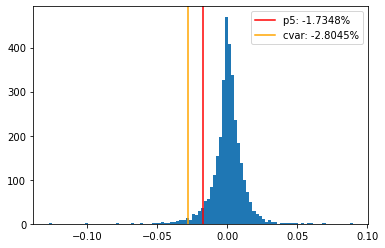

In [56]:
plt.hist(rets, bins=100)
plt.axvline(p5, color='red', label='p5: '+f"{p5:.4%}")
plt.axvline(cvar, color='orange', label='cvar: '+f"{cvar:.4%}")
plt.legend();

## References

https://www.statsmodels.org/dev/_modules/statsmodels/stats/stattools.html 

https://github.com/yhilpisch/py4fi2nd/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html